# INFSCI0510 Data Analysis, Department of Computer Science, SCUPI
# Assignment 4: PCA & Kernel PCA


Recall from the lecture, principal component analysis (PCA) is a latent factor model that finds new basis vectors to transform each sample $\boldsymbol{x}_{i}$ into a lower-dimensional version $\boldsymbol{z}_{i}$. In this assignment, you will first perform PCA on face images. Then combine the kernel trick with PCA to perform non-linear transformations, i.e., the kernel PCA. In this case, the total marks of this assignment are distrubuted as follows:

**200** marks in total:
- **50** marks for the first part "PCA on face images".
- **140** marks for the second part "kernel PCA".
- **10** marks for organization and presentation of your work.


## Data files for this assignment
In order to get hand on the assignment, you have to download the data files and allocate them into the correct directory as follows:

```
├──[your working directory]
   └── X.npy
   └── Y.npy
   └── circles.data
```

**Please make sure to use the correct path to these files when working on your own machine. Recall that the jupyter *.ipynb file (this assignment file) should be in your working directory.**

## 1. PCA for Eigenfaces

In the first part, you will perform PCA on the face images contained in the _Labeled Faces in the Wild_ (LFW) dataset. The LFW dataset contains grey-level face images of famous people. All images are resized to a size of $62\times 47$ pixels. For more information about the dataset, please check this link: http://vis-www.cs.umass.edu/lfw/

In the PCA process with face images, the principle components (PCs) can be displayed as images, and are called _eigenfaces_. Your task is to compute these eigenfaces and apply them in PCA transformations.

### Read the LFW dataset

Use the code below to read the LFW dataset, split it into a training set and a test set, and plot the first face image of the LFW dataset. Note that file _X.npy_ contains face images, while file _Y.npy_ contains the labels, i.e., the name of faces. Also, $\boldsymbol{X}\in\mathbb{R}^{d\times n}$, same as what we learned during lectures.

Total number of faces:  1140
Classes : 5 ['Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder', 'Tony Blair']
Number of faces in the training dataset:  798
Dimensions of feature vectors in the training dataset:  2914
Number of faces in the test dataset:  342
Dimensions of feature vectors in the test dataset:  2914


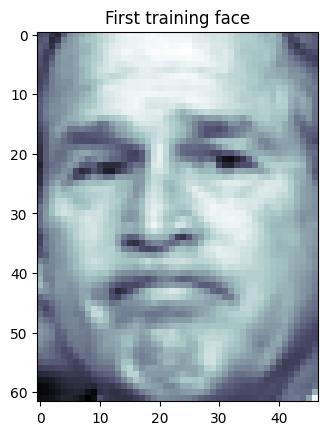

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import PIL 
from sklearn.model_selection import train_test_split


# Load all the images
X = np.load("X.npy")
Y = np.load("Y.npy")

# Display the number of samples
print("Total number of faces: ", X.shape[1])

# Display the classes available in the dataset
target_names = ['Colin Powell','Donald Rumsfeld','George W Bush','Gerhard Schroeder','Tony Blair']
print("Classes : %d" % len(target_names),target_names)

# Split data (X) into a training set and a test set. The test set contains 30% of all data
X_train, X_test, Y_train, Y_test = train_test_split(np.transpose(X), Y, test_size=0.3, random_state=42)
X_train = np.transpose(X_train)
X_test = np.transpose(X_test)

d_train, n_train = X_train.shape
print("Number of faces in the training dataset: ", n_train)
print("Dimensions of feature vectors in the training dataset: ", d_train)

d_test, n_test = X_test.shape
print ("Number of faces in the test dataset: ",n_test)
print ("Dimensions of feature vectors in the test dataset: ", d_test)

# Plot the first image
first_image = X[:,0].reshape(62,47)
plt.imshow(first_image, cmap='bone')
plt.title("First training face")
plt.show()


### <font color='red'>Exercise 1.1: Display Training Faces (5 marks)</font>

Display the first 15 training faces, with the following conditions:

- The 15 faces must be displayed in a grid of 3 X 5, Each face should be displayed with the name at the top, using the 'bone' colormap, in a size of 12 X 12.

**Note:** You may want to build a function for image display, as face visualization is quite often.

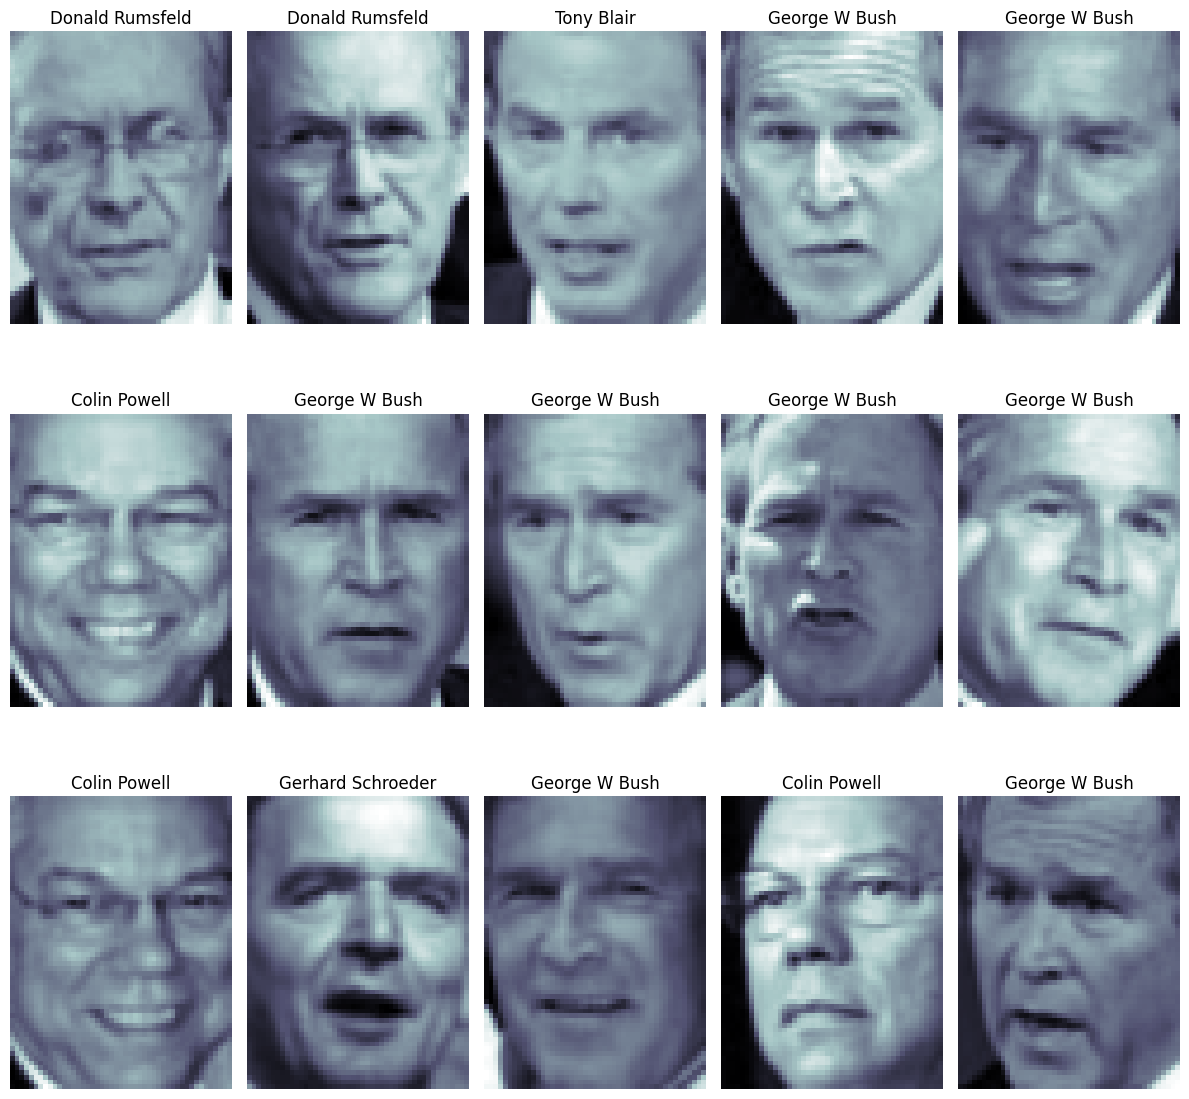

In [74]:
# Display the first 15 training faces (5 marks)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

X = np.load("X.npy")
Y = np.load("Y.npy")

target_names = ['Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder', 'Tony Blair']

X_train, X_test, Y_train, Y_test = train_test_split(np.transpose(X), Y, test_size=0.3, random_state=42)
X_train = np.transpose(X_train)
X_test = np.transpose(X_test)

def display_faces(images, labels, target_names, grid_shape=(3, 5), figsize=(12, 12)):
    plt.figure(figsize=figsize)
    for i in range(grid_shape[0] * grid_shape[1]):
        plt.subplot(grid_shape[0], grid_shape[1], i + 1)
        face_image = images[:, i].reshape(62, 47)
        plt.imshow(face_image, cmap='bone')
        plt.title(target_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_faces(X_train, Y_train, target_names)

### <font color='red'>Exercise 1.2: Implement PCA Decomposition with SVD (5 marks)</font>
Recall that singular value decomposition (SVD) computes three matrices for an input matrix $\boldsymbol{X}$: they are $\boldsymbol{U}$, $\boldsymbol{S}$, and $\boldsymbol{V}$. Now:

- Build a function to apply SVD for PCA decomposition on a dataset, return the top PCs.

**Note:** The arguments of your function can be: the dataset to be transformed, and the number of top PCs to return. </br>
**Note:** Use the _numpy.linalg.svd_ with _full_matrices=True_ for the implementation of SVD, see https://numpy.org/doc/stable/reference/generated/numpy.transpose.html

In [75]:
# The PCA decomposition based on SVD (5 marks)
import numpy as np

def pca_svd(X, n_components):
    X_centered = X - np.mean(X, axis=1, keepdims=True)
    
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=True)
    
    top_pcs = U[:, :n_components]
    
    return top_pcs
top_15_pcs = pca_svd(X_train, n_components=15)

print(top_15_pcs.shape)

(2914, 15)


### <font color='red'>Exercise 1.3: Display The Mean Face and Top 15 Eigenfaces (10 marks)</font>
After setting up the function for PCA decomposition, now you are ready to extract PCs, i.e., the eigenfaces. Please complete the following tasks:
- Display the mean face from the training set. (5 marks)
- Display the top 15 eigenfaces as computed by applying the PCA decomposition on the training set. (5 marks)

**Note:** As usual, each face is displayed with the 'bone' colormap, and the size of 12 X 12. The 15 eigenfaces are displayed in a grid of 3 X 5. </br>
**Note:** Also, please denote the faces with labels; e.g., display the component number of each eigenface at the top of it.

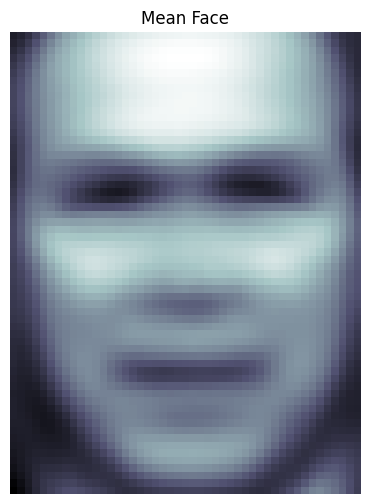

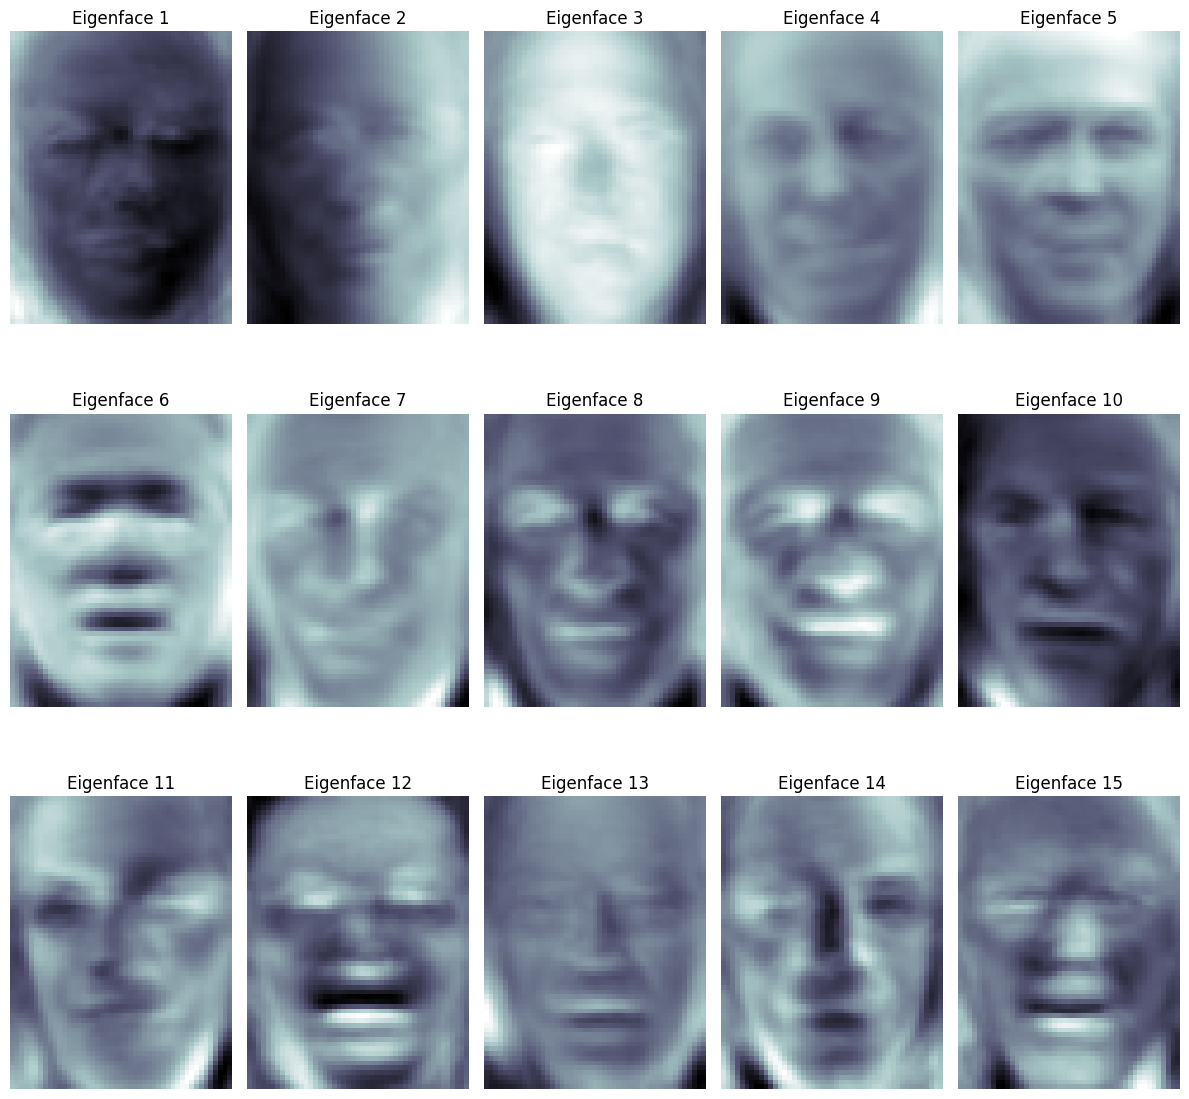

In [76]:
# Display the mean face and top 15 eigenfaces (10 marks)
import numpy as np
import matplotlib.pyplot as plt

X = np.load("X.npy")
Y = np.load("Y.npy")

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(np.transpose(X), Y, test_size=0.3, random_state=42)
X_train = np.transpose(X_train)

mean_face = np.mean(X_train, axis=1).reshape(62, 47)

top_15_eigenfaces = pca_svd(X_train, n_components=15)

plt.figure(figsize=(6, 6))
plt.imshow(mean_face, cmap='bone')
plt.title("Mean Face")
plt.axis('off')
plt.show()

def display_eigenfaces(eigenfaces, grid_shape=(3, 5), figsize=(12, 12)):
    plt.figure(figsize=figsize)
    for i in range(grid_shape[0] * grid_shape[1]):
        plt.subplot(grid_shape[0], grid_shape[1], i + 1)
        eigenface = eigenfaces[:, i].reshape(62, 47)
        plt.imshow(eigenface, cmap='bone')
        plt.title(f"Eigenface {i + 1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_eigenfaces(top_15_eigenfaces)

### <font color='red'>Exercise 1.4: Transform The Test Faces (15 marks)</font>
After extracting PCs (eigenfaces) from training faces, we can use these PCs to perform PCA transformation on test faces. Please complete the following tasks:

- Use the top {100,50,10,2} PCs computed from the training faces, to transform the test faces, respectively. (5 marks)
- In the case of top 2 PCs, plot the transformed test data in a 2D scatter plot, and assign a distinct color to each class. (5 mark)
- Answer the question: what can we see from the decomposition plot? (5 mark)

**Note:** In the 2D plot, the horizontal (vertical) axis depicts the transformed results based on the first (second) PC. Classes refer to names. </br>
**Note:** You may use _np.unique_ to retrieve the unique label values from a set, and _np.where_ to choose the samples with certain label values.

In [77]:
# Transform test images using the top PCs from training faces (5 marks)
import numpy as np
from sklearn.model_selection import train_test_split

X = np.load("X.npy")
Y = np.load("Y.npy")

X_train, X_test, Y_train, Y_test = train_test_split(np.transpose(X), Y, test_size=0.3, random_state=42)
X_train = np.transpose(X_train)
X_test = np.transpose(X_test)

mean_face = np.mean(X_train, axis=1, keepdims=True)
X_train_centered = X_train - mean_face
X_test_centered = X_test - mean_face

def pca_svd(X, n_components):
    U, S, Vt = np.linalg.svd(X, full_matrices=True)
    top_pcs = U[:, :n_components]
    return top_pcs

n_components_list = [100, 50, 10, 2]
transformed_test_data = {}

for n_components in n_components_list:
    top_pcs = pca_svd(X_train_centered, n_components)
    transformed_test_data[n_components] = top_pcs.T @ X_test_centered

for n_components, data in transformed_test_data.items():
    print(f"Test data shape transformed using the first {n_components} principal components:", data.shape)


Test data shape transformed using the first 100 principal components: (100, 342)
Test data shape transformed using the first 50 principal components: (50, 342)
Test data shape transformed using the first 10 principal components: (10, 342)
Test data shape transformed using the first 2 principal components: (2, 342)


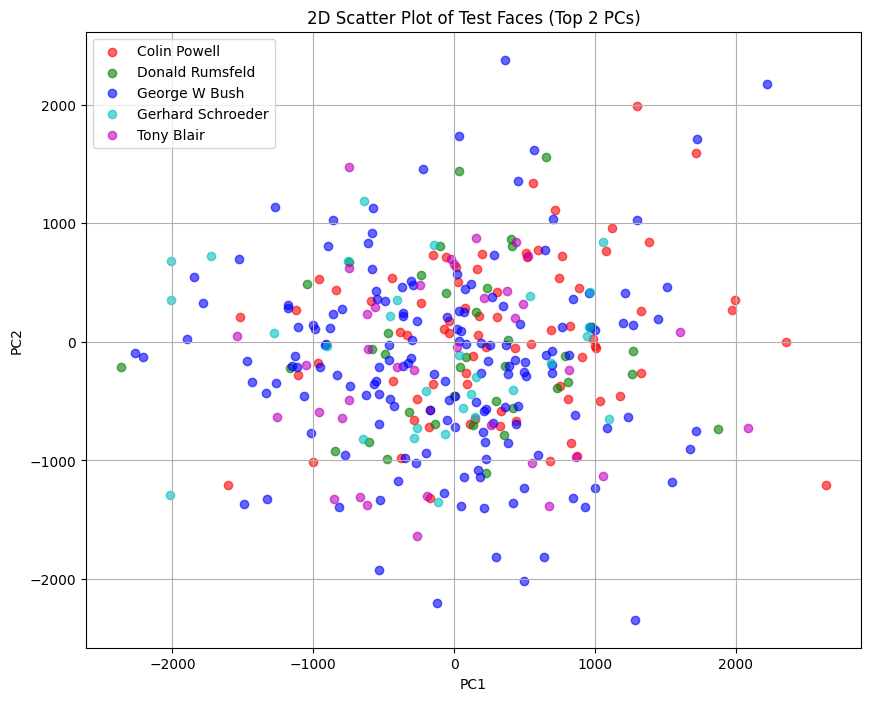

In [78]:
# Plot the transformed test data in a 2D scatter plot (5 marks)
import matplotlib.pyplot as plt

def plot_2d_scatter(transformed_data, labels, target_names):
    plt.figure(figsize=(10, 8))
    unique_labels = np.unique(labels)
    colors = ['r', 'g', 'b', 'c', 'm']
    
    for i, label in enumerate(unique_labels):
        idx = np.where(labels == label)
        plt.scatter(transformed_data[0, idx], transformed_data[1, idx], 
                    c=colors[i], label=target_names[label], alpha=0.6)
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('2D Scatter Plot of Test Faces (Top 2 PCs)')
    plt.legend()
    plt.grid(True)
    plt.show()

transformed_test_2d = transformed_test_data[2]
plot_2d_scatter(transformed_test_2d, Y_test, target_names)

# What can we learn from the decomposition here? (5 marks)
From the decomposition plot, we can see that different categories of faces are distributed differently in the first 2 principal components space. If some classes are clearly separated in the plot, it means that these classes are well separated in the direction of the first two principal components.If some classes overlap heavily in the plot, it means that the first two principal components are not enough to completely distinguish these classes.


### <font color='red'>Exercise 1.5: Reconstruct The Test Faces (15 marks)</font>
After PCA transformation using the top {100,50,10,2} PCs on the test faces, the data dimensionality has been reduced accordingly. Next, the PCA process also defines a reconstruction step where information loss can be measured. Please complete the following tasks:

- For the test data transformed using the top {100,50,10,2} PCs computed from the training faces, reconstruct test faces and compute the MSE between all test faces and their reconstructed versions. (5 marks)
- Display the first 5 reconstructed faces, repeat the display for each case of the top {100,50,10,2} PCs. (5 marks)
- With the face plots and the MSE values, what can you summarize from the PCA processes with the four cases (top {100, 50, 10, 2} PCs)? (5 marks)

**Note:** As usual, each face is displayed with the 'bone' colormap, and the size of 12 X 12. The 20 faces are displayed in a grid of 4 X 5. </br>
**Note:** Also, please denote the faces with labels to understand their identities and the PC numbers.

In [79]:
# Reconstruct the transformed test faces, compute the MSE (5 marks)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X = np.load("X.npy")
Y = np.load("Y.npy")

X_train, X_test, Y_train, Y_test = train_test_split(np.transpose(X), Y, test_size=0.3, random_state=42)
X_train = np.transpose(X_train)
X_test = np.transpose(X_test)

mean_face = np.mean(X_train, axis=1, keepdims=True)
X_train_centered = X_train - mean_face
X_test_centered = X_test - mean_face

def pca_svd(X, n_components):
    U, S, Vt = np.linalg.svd(X, full_matrices=True)
    top_pcs = U[:, :n_components]
    return top_pcs

def reconstruct_data(transformed_data, top_pcs, mean_face):
    return (top_pcs @ transformed_data) + mean_face

def compute_mse(original_data, reconstructed_data):
    return np.mean((original_data - reconstructed_data) ** 2)

n_components_list = [100, 50, 10, 2]
mse_values = {}

for n_components in n_components_list:
    top_pcs = pca_svd(X_train_centered, n_components)
    transformed_test_data = top_pcs.T @ X_test_centered
    reconstructed_test_data = reconstruct_data(transformed_test_data, top_pcs, mean_face)
    mse_values[n_components] = compute_mse(X_test, reconstructed_test_data)

for n_components, mse in mse_values.items():
    print(f"MSE of reconstructing test data using the first {n_components} principal components: {mse:.4f}")

MSE of reconstructing test data using the first 100 principal components: 155.2505
MSE of reconstructing test data using the first 50 principal components: 243.3460
MSE of reconstructing test data using the first 10 principal components: 522.5823
MSE of reconstructing test data using the first 2 principal components: 915.7021


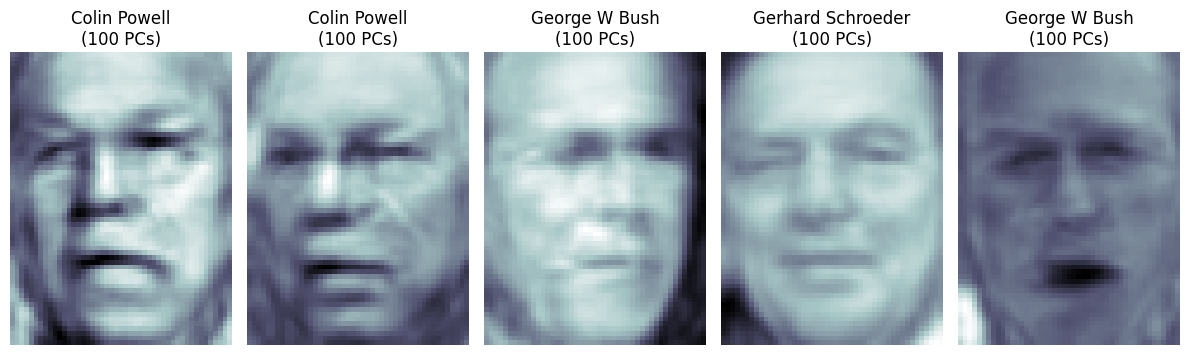

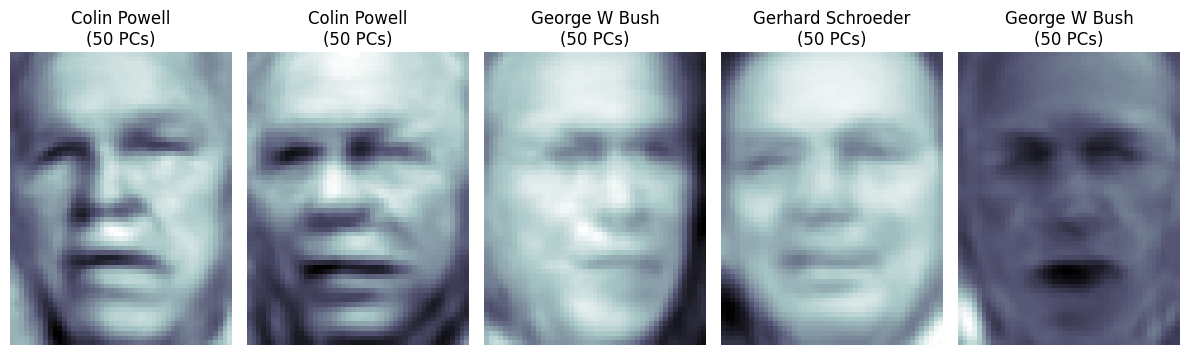

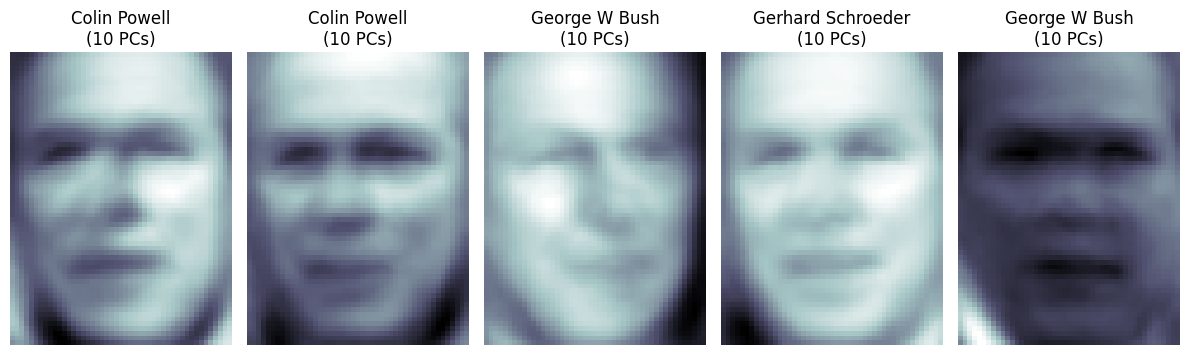

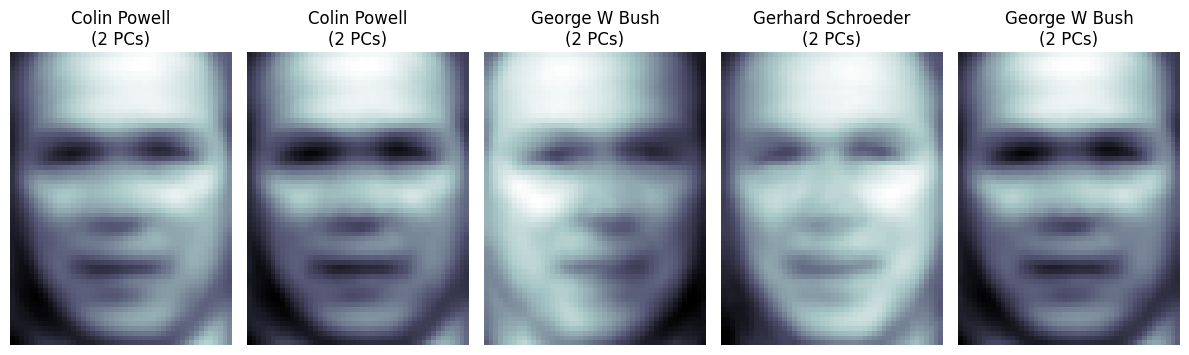

In [80]:
# Display reconstructed faces (5 marks)
def display_reconstructed_faces(reconstructed_data, labels, target_names, n_components, figsize=(12, 12)):
    plt.figure(figsize=figsize)
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        face_image = reconstructed_data[:, i].reshape(62, 47)
        plt.imshow(face_image, cmap='bone')
        plt.title(f"{target_names[labels[i]]}\n({n_components} PCs)")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

for n_components in n_components_list:
    top_pcs = pca_svd(X_train_centered, n_components)
    transformed_test_data = top_pcs.T @ X_test_centered
    reconstructed_test_data = reconstruct_data(transformed_test_data, top_pcs, mean_face)
    display_reconstructed_faces(reconstructed_test_data, Y_test, target_names, n_components)

# With the face plots and the MSE values, what can you summarize from the four cases (top {100, 50, 10, 2} PCs)? (5 marks)
From the PCA process and reconstruction results, it can be seen that as the number of principal components decreases, the quality of the reconstructed image gradually decreases, and the MSE value gradually increases: when 100 principal components are used, the reconstructed image is almost the same as the original image, and the MSE value is very small. When using 50 principal components, the reconstructed image still retains more details, but has slight distortion. When using 10 principal components, the image is blurred and the details are lost obviously. However, when using two principal components, the reconstructed image can only show the outline of the face roughly, and the information loss is serious. This shows that PCA achieves data compression through dimensionality reduction, but it leads to information loss, and a smaller number of principal components leads to a higher compression rate but a lower reconstruction quality. Therefore, in practice, a trade-off between compression rate and reconstruction quality should be made according to the requirements.


# -------------------------------------------------------------------------------------

## 2. Kernel PCA
Kernel PCA is a combined technique of PCA and the kernel trick, where we are still interested in using the PCA process to find the features $\boldsymbol{Z}\in\mathbb{R}^{k\times n}$. However, such a transformation from $\boldsymbol{X}\in\mathbb{R}^{d\times n}$ to $\boldsymbol{Z}\in\mathbb{R}^{k\times n}$ now becomes non-linear, as a non-linear kernel function can be applied to first transformed $\boldsymbol{X}\in\mathbb{R}^{d\times n}$ to $\phi(\boldsymbol{X})\in\mathbb{R}^{D\times n}$ in a superspace with $D>d$, then, the linear PCA is performed to transform $\phi(\boldsymbol{X})\in\mathbb{R}^{D\times n}$ to $\boldsymbol{Z}\in\mathbb{R}^{k\times n}$. This kernel PCA process brings a major advantage:

- Since the calculation of $\boldsymbol{Z}$ can be non-linear, and the dimensionality of $\boldsymbol{Z}$ is now $k\in [1, D)$ with $D>d$, these characteristics allow us to search for solutions in a new space (not limited by the original dimentionality $d$), and such solutions may be linear.

For example, with kernel PCA, for a linearly-inseparable dataset $\boldsymbol{X}\in\mathbb{R}^{d\times n}$ with a low dimensionality, e.g., d = 2, now it may be possible to solve such classification task with linear solutions, while in a new space.

However, we would like to avoid the explicit computation of the high-dimensional $\phi(\boldsymbol{X})$ for the PCA decomposition, which can
be done by involving the kernel function $K(\boldsymbol{x}_{i}, \boldsymbol{x}_{j})=<\phi(\boldsymbol{x}_{i}),\phi(\boldsymbol{x}_{j})>$ with the plain PCA, creating the kernel PCA solution. Two different kernel function will be explored in this assignment:

1. Homogeneous Polynomial kernel: $K(\boldsymbol{x}_{i}, \boldsymbol{x}_{j})=(<\boldsymbol{x}_{i}, \boldsymbol{x}_{j}>)^{p}$, where $p>0$ is the polynomial degree.
2. Radial Basis Function (RBF) kernel: $K(\boldsymbol{x}_{i}, \boldsymbol{x}_{j})=e^{-\gamma ||\boldsymbol{x}_{i}-\boldsymbol{x}_{j}||_{2}^{2}}$, where $\gamma=\frac{1}{2\sigma^{2}}$ and $\sigma$ is the width or scale of a Gaussian distribution centered at $\boldsymbol{x}_{j}$.


### Dataset and Task Summary

The dataset for this coursework is the _Circles_ Dataset, a synthetic dataset widely used to design and test models. The dataset contains 500 2-dimentional samples varying in two classes, i.e., $\boldsymbol{X}\in\mathbb{R}^{2\times 500}$, stored in the file _Circles.data_.

_Circles.data_ is constructed by three columns of data: the first two columns represent the two features of $\boldsymbol{X}$, while the third column denotes the class labels, i.e., class 1 or class 2. To load the dataset, please maintain the _Circles.data_ file under the same directory with your code file. You can have a try to plot the dataset and see how the two-class samples are distributed.

The task in this course work is using kernel PCA to transform the original dataset $\boldsymbol{X}\in\mathbb{R}^{2\times 500}$ into a linearly-separable dataset $\boldsymbol{Z}\in\mathbb{R}^{k\times 500}$ with the minimum number of PCs, i.e., a minimum $k$ value. To confirm if the dataset can be made linearly separable, we will use a very simple classification model, decision stump. In sum, the whole process can be divided into the following steps:

1. Choose a kernel function with appropriate hyperparameter value.
2. Apply kernel PCA on the original set $\boldsymbol{X}\in\mathbb{R}^{2\times 500}$ to generate the transformed data $\boldsymbol{Z}\in\mathbb{R}^{k\times 500}$.
3. Find the minimum number of PCs, i.e., the minimum $K$ value required for one decision stump to classify all data points in $\boldsymbol{Z}$ correctly.

The tasks to complete are elaborated into different exercises, which will be detailed in following sections.

### <font color='red'>Exercise 2.1: Theoretical Clarification (80 marks)</font>
- Please use equations to mathematically prove how we can compute the PC matrix for $\phi(\boldsymbol{X})$ using the kernel trick. (40 marks)
- Please use equations to mathematically prove how to compute the transformed dataset $\boldsymbol{Z}$. (40 marks)

**Note:** We only accept Markdown text, where equations should be formed by latex. Fail to comply with the rule will get a immediate 0 mark. </br>
**Note:** $\phi(\boldsymbol{X})$ may exist in the computation of PC matrix, however, it must never show up in the computation of the transformed dataset $\boldsymbol{Z}$. </br>
**Note:** Recall how SVD works with $\phi(\boldsymbol{X})$, then link the SVD with the kernel function $K(\boldsymbol{x}_{i}, \boldsymbol{x}_{j})=<\phi(\boldsymbol{x}_{i}),\phi(\boldsymbol{x}_{j})>$, or the kernel matrix $\boldsymbol{K}$. </br>
**Note:** Since this exercise is the foundation, inaccurate answer of this exercise means that your code or any discussions are built from inaccurate theories. In this case, 25% of your marks from the rest Exercises (2.2 and 2.3) will be deducted.

# Mathematically prove how we can compute the PC matrix (40 marks)
Given the dataset $\boldsymbol{X} \in \mathbb{R}^{d \times n}$, The kernel function $K(\boldsymbol{x}_i, \boldsymbol{x}_j) = \langle \phi(\boldsymbol{x}_i), \phi(\boldsymbol{x}_j) \rangle$, We can map the data to the high-dimensional feature space $\phi(\boldsymbol{X}) \in \mathbb{R}^{D \times n}$, where $D > d$.  
In Kernel PCA, instead of explicitly computing $\phi(\boldsymbol{X})$, we implement the PCA decomposition via the kernel matrix $\boldsymbol{K}$. The kernel matrix is defined as follows.
$$
\boldsymbol{K} = \phi(\boldsymbol{X})^\top \phi(\boldsymbol{X}) \in \mathbb{R}^{n \times n}
$$
Among them, the $\ boldsymbol {K} _ {ij} = K (\ boldsymbol {x} _i, \ boldsymbol {x} _j) $. 
To compute the principal components, we perform an eigenvalue decomposition of the kernel matrix $\boldsymbol{K}$:
$$
\boldsymbol{K} = \boldsymbol{V} \boldsymbol{\Lambda} \boldsymbol{V}^\top
$$
$\boldsymbol{V}$is the matrix of eigenvectors.  
$\boldsymbol{\Lambda}$is a diagonal matrix of eigenvalues.  
The principal component matrix $\boldsymbol{Z}$can be calculated by:
$$
\boldsymbol{Z} = \boldsymbol{\Lambda}^{-\frac{1}{2}} \boldsymbol{V}^\top
$$
Where $\boldsymbol{\Lambda}^{-\frac{1}{2}}$is the inverse of the square root of the eigenvalue.

# Mathematically prove how to compute the transformed dataset (40 marks)
To ensure that the data is centered in the feature space, we adjust the kernel matrix:
$$
\boldsymbol{K}_c = \boldsymbol{K} - \boldsymbol{1}_n \boldsymbol{K} - \boldsymbol{K} \boldsymbol{1}_n + \boldsymbol{1}_n  \boldsymbol{K} \boldsymbol{1}_n
$$
Where $\boldsymbol{1}_n$is the $n \times n$matrix with all $1$ entries.  
The eigenvalues of the centered kernel matrix $\boldsymbol{K}_c$are decomposed as follows:
$$
\boldsymbol{K}_c = \boldsymbol{V} \boldsymbol{\Lambda} \boldsymbol{V}^\top
$$
The transformed dataset $\boldsymbol{Z}$consists of the first $k$principal components:
$$
\boldsymbol{Z} = \boldsymbol{\Lambda}_{:k}^{-\frac{1}{2}} \boldsymbol{V}_{:k}^\top
$$  
$\boldsymbol{\Lambda}_{:k}$is the diagonal matrix of the first $k$eigenvalues.  
$\boldsymbol{V}_{:k}$is the corresponding matrix of the first $k$eigenvectors.  

### <font color='red'>Exercise 2.2: The Kernel PCA (30 marks)</font>
Based on the theories from Exercise 1, try different kernels (Homogeneous Polynomial or Gaussian) with the corresponding hyperparameters that can be used in conjunction with PCA to produce the transformed dataset $\boldsymbol{Z}$. More specifically, complete the follow tasks:
- Implement kernel PCA. (15 marks)
- What kind of projection can be achieved with the Homogeneous Polynomial kernel and with the Gaussian kernel? (5 marks)
- What is the influence of the degree $p$ in a Homogeneous Polynomial kernel? (5 marks)
- How can one relate the Gaussian width $\sigma$ to the data available? (5 marks)

**Note:** You don't really have to take the linear classification task into consideration here. </br>
**Note:** You should NOT copy & paste words or sentences from somewhere to answer these questions. Much better answers should be formed by math analysis or experimental results from your code. </br>
**Note:** there are ready-to-use implementations of kernel PCA in Python. You must implement your own solution and must not use any such libraries, otherwise, an immediate 0 mark will be given to any related tasks. More specifically:

Libraries that implement the main solutions operations **MUST NOT** be used: </br>
-> The linear version of PCA </br>
-> The non-linear version of PCA, i.e., kernel PCA </br>

Libraries that implement basic operations can be used, for example: </br>
-> Mean, variance, standardize data, ... </br>
-> Plotting </br>
-> Matrix and vector multiplications, inverse, transpose, ... </br>
-> Computation of distance, divergence, or accuracy, ... </br>
-> Singular value decomposition


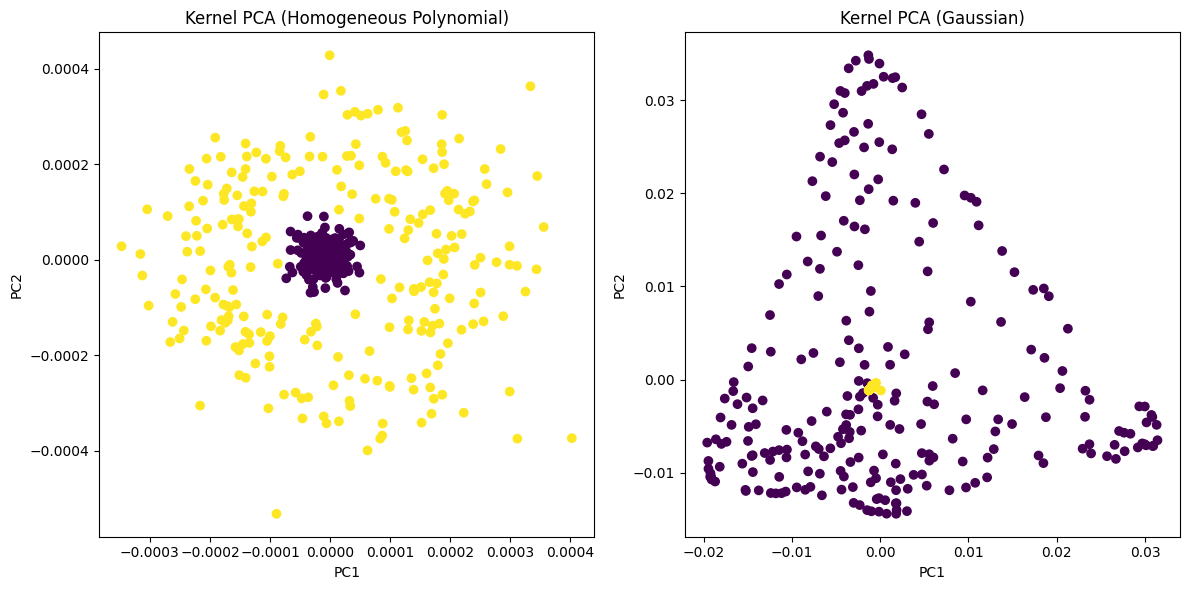

In [81]:
# Implementation of kernel PCA (15 marks)
import numpy as np
import matplotlib.pyplot as plt

def homogeneous_polynomial_kernel(X, Y, p):
    return (X.T @ Y) ** p

def gaussian_kernel(X, Y, gamma):
    dist_sq = np.sum(X**2, axis=0)[:, np.newaxis] + np.sum(Y**2, axis=0) - 2 * (X.T @ Y)
    return np.exp(-gamma * dist_sq)

def kernel_pca(X, kernel_func, k, kernel_params):
    n = X.shape[1]

    K = kernel_func(X, X, **kernel_params)

    ones_n = np.ones((n, n)) / n
    K_centered = K - ones_n @ K - K @ ones_n + ones_n @ K @ ones_n

    eigvals, eigvecs = np.linalg.eigh(K_centered)

    top_eigvals = eigvals[-k:][::-1]
    top_eigvecs = eigvecs[:, -k:][:, ::-1]

    Z = np.diag(top_eigvals**-0.5) @ top_eigvecs.T
    
    return Z

data = np.loadtxt("Circles.data", delimiter=',', dtype=float)
X = data[:, :2].T
y = data[:, 2]

kernel_params_poly = {"p": 2}
Z_poly = kernel_pca(X, homogeneous_polynomial_kernel, k=2, kernel_params=kernel_params_poly)

kernel_params_gaussian = {"gamma": 1.0}
Z_gaussian = kernel_pca(X, gaussian_kernel, k=2, kernel_params=kernel_params_gaussian)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Z_poly[0, :], Z_poly[1, :], c=y, cmap='viridis')
plt.title("Kernel PCA (Homogeneous Polynomial)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(1, 2, 2)
plt.scatter(Z_gaussian[0, :], Z_gaussian[1, :], c=y, cmap='viridis')
plt.title("Kernel PCA (Gaussian)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()

# What kind of projection can be achieved with the Homogeneous Polynomial kernel and with the Gaussian kernel? (10 marks)  

Homogeneous Polynomial kernels capture nonlinear relationships in the data through polynomial features such as square and cross terms for p=2. For simple polynomial structures, it can effectively reduce dimension and classify. However, as shown here, for complex nonlinear structures such as the ring dataset, it has limited performance and cannot completely separate the two classes of data.  


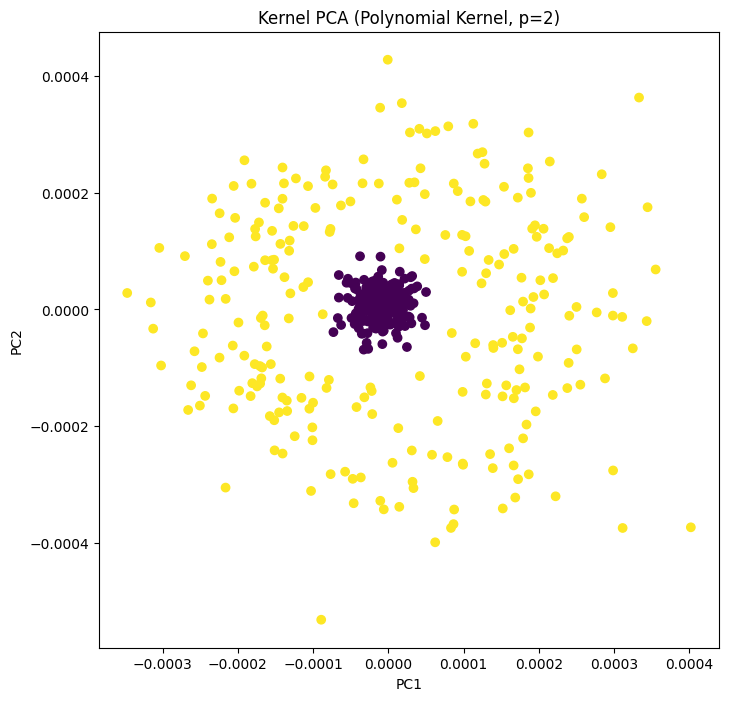

In [82]:
plt.figure(figsize=(8, 8))
plt.scatter(Z_poly[0, :], Z_poly[1, :], c=y, cmap='viridis')
plt.title("Kernel PCA (Polynomial Kernel, p=2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

  
The Gaussian kernel function captures the nonlinear structure of the data through the local similarity, which is suitable for dealing with complex geometric shapes (such as ring datasets). It can completely separate the two types of data from the ring data set, showing a powerful nonlinear mapping ability. In contrast, the Gaussian kernel function is more suitable for handling classification tasks with complex structures.

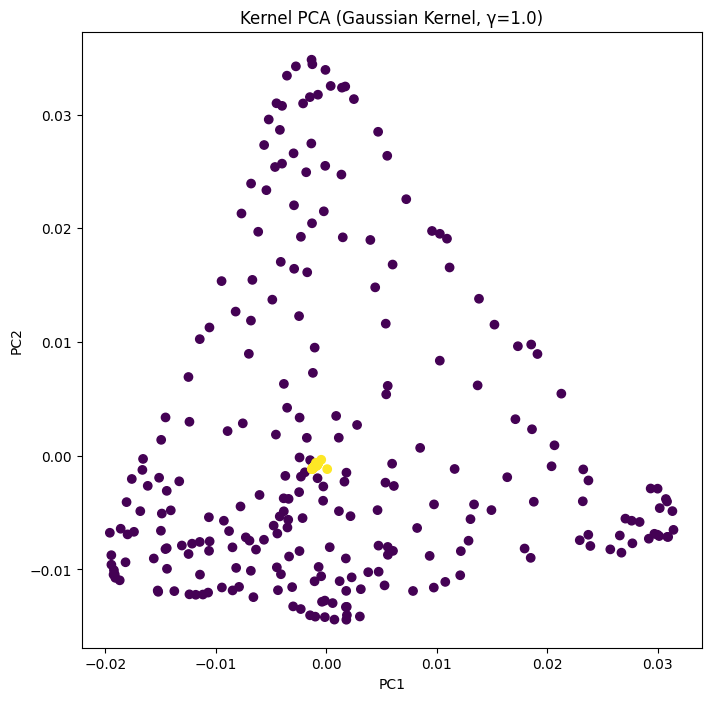

In [83]:
plt.figure(figsize=(8, 8))
plt.scatter(Z_gaussian[0, :], Z_gaussian[1, :], c=y, cmap='viridis')
plt.title("Kernel PCA (Gaussian Kernel, γ=1.0)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# What is the influence of the degree in a Homogeneous Polynomial kernel? (5 marks)
As shown in the figure, I experimented by changing the value of p and output the image.   

When p=1, the data points are moderately spread out, and the classes are less well separated. As p increases to p=2, you can see that the distribution of data points in the feature space changes, and data points from different classes are clustered and separated differently in the new space.  

When p continues to increase to p=3 and p=4, the difference in the distribution of data points becomes more obvious. The proportion of the space occupied by the data points of the purple category becomes smaller, and the situation surrounded by the yellow data points in the feature space becomes more prominent, which indicates that the high-degree polynomial kernel function has a significant impact on the location and distribution of the data points in the feature space, and enhances the separation between the data points of different categories. But it may also exacerbate the tendency to overfit.


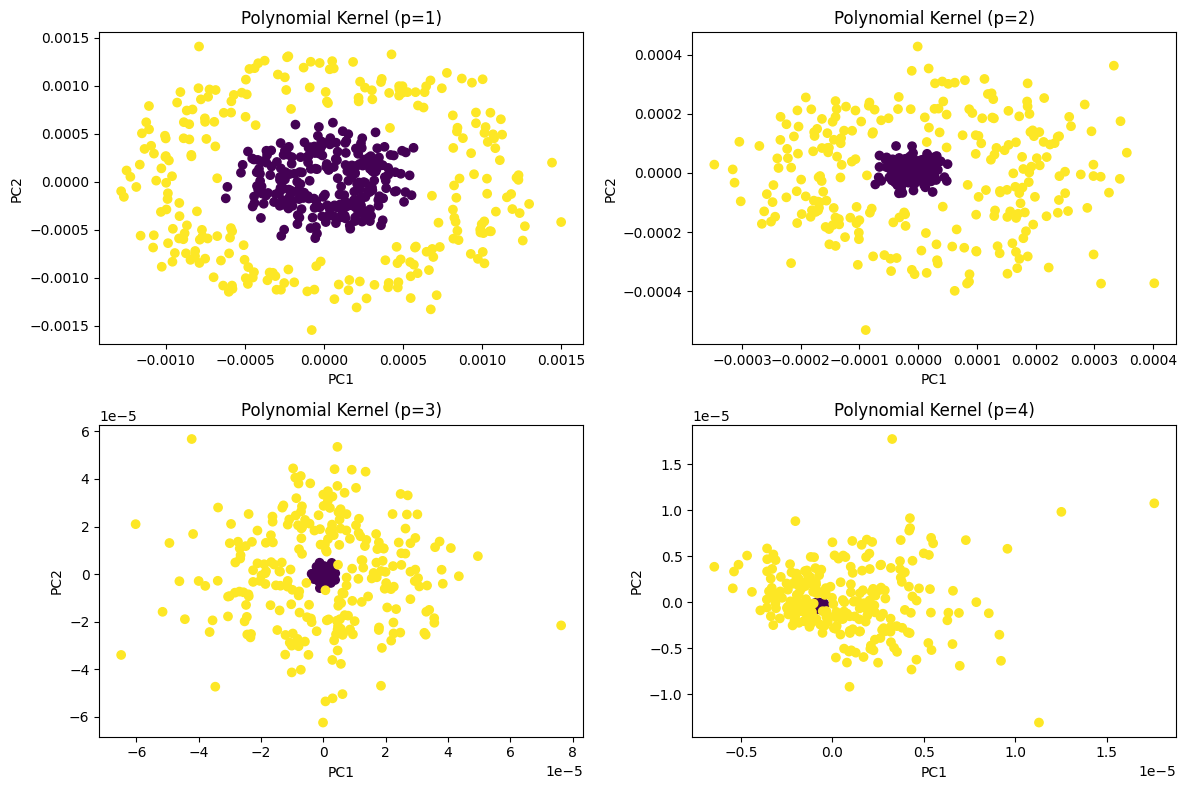

In [84]:
p_values = [1, 2, 3, 4]
plt.figure(figsize=(12, 8))

for i, p in enumerate(p_values):
    kernel_params_poly = {"p": p}
    Z_poly = kernel_pca(X, homogeneous_polynomial_kernel, k=2, kernel_params=kernel_params_poly)
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(Z_poly[0, :], Z_poly[1, :], c=y, cmap='viridis')
    plt.title(f"Polynomial Kernel (p={p})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")

plt.tight_layout()
plt.show()

# How can one relate the Gaussian width to the data available? (5 marks)
As shown in the figure, I experimented by changing the value of σ and output the image.  

When σ is small, the "Gaussian Kernel (σ = 0.1)" image in the top left corner shows that the data points are relatively concentrated and close to each other. This is because a small σ makes the range of the Gaussian kernel function small, the data points are mainly affected by a few points nearby, the kernel function decays quickly, and the mapped data are clustered together in the feature space.
And the data points tend to form small clusters, and the boundaries between different clusters are relatively clear. In a plot like σ = 0.1, there is no obvious large cluster structure in the data points, and the data points are more likely to be clustered in small areas.
In addition, the nonlinear mapping degree of the Gaussian kernel function to the data is relatively weak, and the distribution of the data points in the low-dimensional space (the principal component space represented by PC1 and PC2 in the figure) is similar to the original data distribution characteristics, without obvious complex distortion.  

When σ is large, observe the "Gaussian Kernel (σ = 2)" image in the bottom right corner, and the data points are more dispersed. The larger σ makes the Gaussian kernel function wider, the data points are affected by distant points, and the kernel function decays slowly, making the mapped data distribute more widely in the feature space.
And the cluster structure of data points may become ambiguous. In the graph with σ = 2, the distribution of yellow and purple points is mixed to an increased degree, the cluster structure that might have been clear is weakened, and the data points of different classes infiltrate each other, making it difficult to distinguish the clear cluster boundaries.
In addition, the degree of nonlinear mapping is enhanced, and the data points are more strongly distorted and transformed in the feature space, which can capture more complex nonlinear relationships in the data, so that the data that is originally linearly separable in the low-dimensional space may become linearly separable in the high-dimensional feature space.  

In summary, in Gaussian kernel, σ will affect the data distribution compactness, clustering effect, nonlinear mapping.

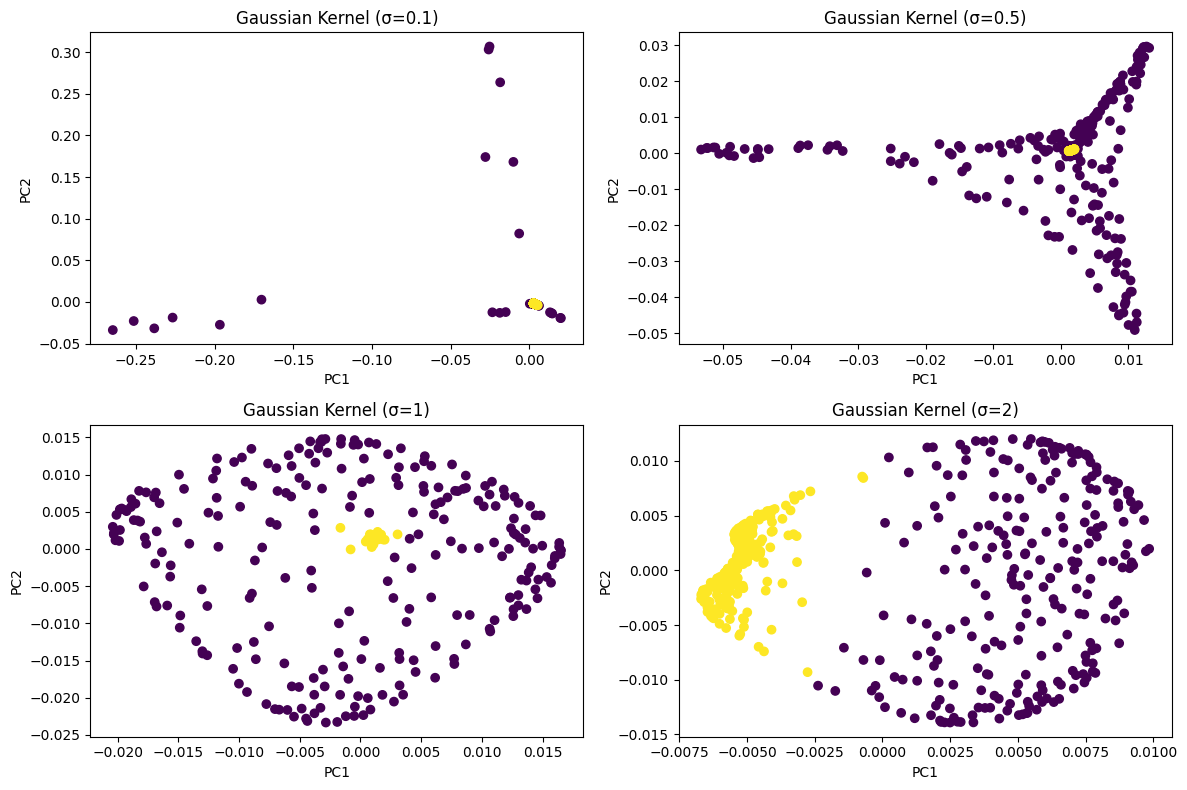

In [85]:
sigma_values = [0.1, 0.5, 1, 2]
plt.figure(figsize=(12, 8))

for i, sigma in enumerate(sigma_values):
    gamma = 1 / (2 * sigma**2)
    kernel_params_gaussian = {"gamma": gamma}
    Z_gaussian = kernel_pca(X, gaussian_kernel, k=2, kernel_params=kernel_params_gaussian)
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(Z_gaussian[0, :], Z_gaussian[1, :], c=y, cmap='viridis')
    plt.title(f"Gaussian Kernel (σ={sigma})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")

plt.tight_layout()
plt.show()

### <font color='red'>Exercise 2.3: Non-Linear Transformation for Linearly-Separability (30 marks)</font>
After the kernel PCA implementation and hyperparameter reasoning from Exercise 2.2, the next step is to confirm the kernel PCA with selected setting of hyperparameters. Such kernel PCA process produces the transformed dataset $\boldsymbol{Z}$, where one decision stump must correcly classify all the samples. Complete the following tasks:
- Please justify the metric used to fit the decision stump. (5 marks) </br>
- Determine the minimum number of PCs (i.e., $k$) required to classify all the samples in the dataset $\boldsymbol{Z}$ correctly, using one decision stump. (10 marks) </br>
- For the transformed dataset $\boldsymbol{Z}$, if the minimum number of PCs satisfies k ≤ 3, plot the visualization of the transformed dataset $\boldsymbol{Z}$. Otherwise (for k > 3), simply state the incapability of providing the visualization by providing your classification results. (5 marks) </br>
- Plot the visualization of the input data, i.e., the 1-D feature, of the decision stump with highest accuracy. (5 marks) </br>
- Provide the splitting rule and the accuracy of the decision stump. (5 marks) </br>

**Note:** One decision stump means that we view only one feature from $\boldsymbol{Z}$, then apply the decision stump </br>
**Note:** When checking for the last time about whether your code can generate the correct results, please remember to Restart Kernel and Run All Cells. As we will do the same to mark your work.

# Answer
1.Decision Stump is a simple binary classification model that splits the data based on a threshold of a single feature. We use Accuracy as our evaluation metric because it directly measures the proportion of all samples that the model correctly classified.  

-----  


In [86]:
#2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

data = np.loadtxt("Circles.data", delimiter=',', dtype=float)
X = data[:, :2].T
y = data[:, 2]

def kernel_pca(X, kernel_func, k, kernel_params):
    n = X.shape[1]
    K = kernel_func(X, X, **kernel_params)
    ones_n = np.ones((n, n)) / n
    K_centered = K - ones_n @ K - K @ ones_n + ones_n @ K @ ones_n
    eigvals, eigvecs = np.linalg.eigh(K_centered)
    top_eigvals = eigvals[-k:][::-1]
    top_eigvecs = eigvecs[:, -k:][:, ::-1]
    Z = np.diag(top_eigvals**-0.5) @ top_eigvecs.T
    return Z

def gaussian_kernel(X, Y, gamma):
    dist_sq = np.sum(X**2, axis=0)[:, np.newaxis] + np.sum(Y**2, axis=0) - 2 * (X.T @ Y)
    return np.exp(-gamma * dist_sq)

def polynomial_kernel(X, Y, p):
    return (X.T @ Y) ** p

kernel_funcs = {
    "Gaussian": (gaussian_kernel, {"gamma": 1.0}),
    "Polynomial": (polynomial_kernel, {"p": 2}),
}

min_k = None
best_kernel = None
best_accuracy = 0.0

for kernel_name, (kernel_func, kernel_params) in kernel_funcs.items():
    print(f"Testing {kernel_name} kernel...")
    for k in range(1, 21):
        Z = kernel_pca(X, kernel_func, k, kernel_params)

        decision_stump = DecisionTreeClassifier(max_depth=1)
        decision_stump.fit(Z[:k, :].T, y)
        accuracy = decision_stump.score(Z[:k, :].T, y)
        
        if accuracy > best_accuracy:
            min_k = k
            best_kernel = kernel_name
            best_accuracy = accuracy
            print(f"Use the {kernel_name} kernel with k={k} and accuracy ={accuracy*100:.2f}%")
        
        if accuracy == 1.0:
            break
    if best_accuracy == 1.0:
        break

print(f"Best kernel function: {best_kernel}, minimum k value: {min_k}, best accuracy: {best_accuracy*100:.2f}%")

Testing Gaussian kernel...
Use the Gaussian kernel with k=1 and accuracy =75.20%
Use the Gaussian kernel with k=2 and accuracy =81.60%
Use the Gaussian kernel with k=3 and accuracy =82.80%
Use the Gaussian kernel with k=4 and accuracy =96.60%
Testing Polynomial kernel...
Use the Polynomial kernel with k=3 and accuracy =99.60%
Best kernel function: Polynomial, minimum k value: 3, best accuracy: 99.60%


2.Through experiments, we find that using Polynomial kernel function, when the number of principal components k=3, the accuracy rate reaches 99.60%, which is close to 100%. This is also the best result so far.
Hence, we choose to use Polynomial kernel and take k to be 3.  

-------  


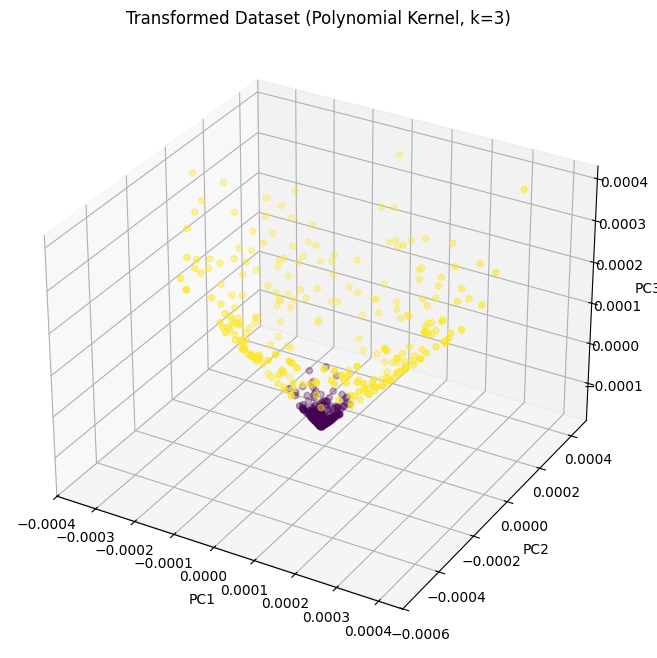

In [87]:
#3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

data = np.loadtxt("Circles.data", delimiter=',', dtype=float)
X = data[:, :2].T
y = data[:, 2]

def kernel_pca(X, kernel_func, k, kernel_params):
    n = X.shape[1]
    K = kernel_func(X, X, **kernel_params)
    ones_n = np.ones((n, n)) / n
    K_centered = K - ones_n @ K - K @ ones_n + ones_n @ K @ ones_n
    eigvals, eigvecs = np.linalg.eigh(K_centered)
    top_eigvals = eigvals[-k:][::-1]
    top_eigvecs = eigvecs[:, -k:][:, ::-1]
    Z = np.diag(top_eigvals**-0.5) @ top_eigvecs.T
    return Z

def polynomial_kernel(X, Y, p):
    return (X.T @ Y) ** p

kernel_params = {"p": 2}
Z = kernel_pca(X, polynomial_kernel, k=3, kernel_params=kernel_params)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z[0, :], Z[1, :], Z[2, :], c=y, cmap='viridis')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("Transformed Dataset (Polynomial Kernel, k=3)")
plt.show()

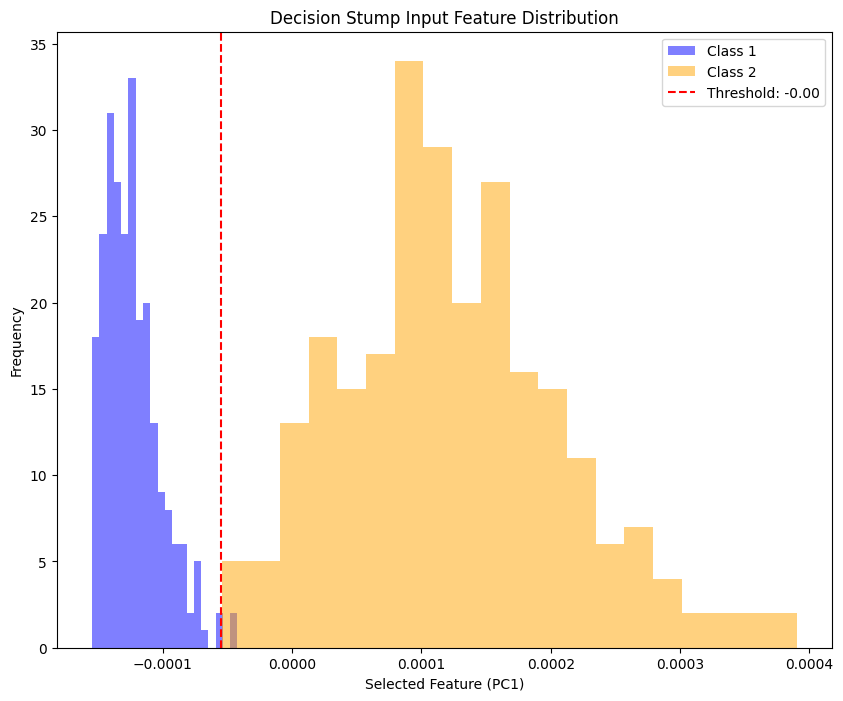

Split rule: If the feature value <= -0.0000549910, classify as Class 1; otherwise, classify as Class 2
Decision tree accuracy: 99.60%


In [88]:
#4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

data = np.loadtxt("Circles.data", delimiter=',', dtype=float)
X = data[:, :2].T
y = data[:, 2]

def kernel_pca(X, kernel_func, k, kernel_params):
    n = X.shape[1]
    K = kernel_func(X, X, **kernel_params)
    ones_n = np.ones((n, n)) / n
    K_centered = K - ones_n @ K - K @ ones_n + ones_n @ K @ ones_n
    eigvals, eigvecs = np.linalg.eigh(K_centered)
    top_eigvals = eigvals[-k:][::-1]
    top_eigvecs = eigvecs[:, -k:][:, ::-1]
    Z = np.diag(top_eigvals**-0.5) @ top_eigvecs.T
    return Z

def polynomial_kernel(X, Y, p):
    return (X.T @ Y) ** p

kernel_params = {"p": 2}  # 选择 p=2
Z = kernel_pca(X, polynomial_kernel, k=3, kernel_params=kernel_params)

decision_stump = DecisionTreeClassifier(max_depth=1)
decision_stump.fit(Z[:3, :].T, y)

selected_feature = Z[decision_stump.tree_.feature[0], :]
threshold = decision_stump.tree_.threshold[0]

plt.figure(figsize=(10, 8))
plt.hist(selected_feature[y == 1], bins=20, alpha=0.5, label="Class 1", color='blue')
plt.hist(selected_feature[y == 2], bins=20, alpha=0.5, label="Class 2", color='orange')
plt.axvline(threshold, color='red', linestyle='--', label=f"Threshold: {threshold:.2f}")
plt.xlabel("Selected Feature (PC1)")
plt.ylabel("Frequency")
plt.title("Decision Stump Input Feature Distribution")
plt.legend()
plt.show()

accuracy = decision_stump.score(Z[:3, :].T, y)
print(f"Split rule: If the feature value <= {threshold:.10f}, classify as Class 1; otherwise, classify as Class 2")  
print(f"Decision tree accuracy: {accuracy * 100:.2f}%")

In [89]:
#5
accuracy = decision_stump.score(Z[:3, :].T, y)

print(f"Splitting rule: If the feature value <= {threshold:.10f}, classify as Class 1; otherwise, classify as Class 2")
print(f"Decision tree accuracy: {accuracy * 100:.2f}%")

Splitting rule: If the feature value <= -0.0000549910, classify as Class 1; otherwise, classify as Class 2
Decision tree accuracy: 99.60%


Hence, If the feature value <= -0.0000549910, classify as Class 1; otherwise, classify as Class 2.

## <font color='blue'>Submission</font>

Please submit the .ipynb file with your answer, and rename the file as _A4-[Section Number]-[Student ID]-[Your name]_. </br>
For example, _A4-01-2023141520000-Sophia.ipynb_